In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import scipy.misc
import os
import pickle as pkl
import numpy as np
import argparse
from tqdm import tqdm
from scipy.misc import imresize

In [2]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        # In the simplest case, the output value of the layer with input size (N,Cin,H,W)(N, C_{\text{in}}, H, W)(N,Cin​,H,W) and output (N,Cout,Hout,Wout)(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})(N,Cout​,Hout​,Wout​) 
        self.conv1 = nn.Conv2d(3, 32, 5, 1, 2)
        self.pool1 = nn.MaxPool2d(3,2, ceil_mode = True)
        self.conv2 = nn.Conv2d(32, 16, 5, 1, 2)
        self.pool2 = nn.AvgPool2d(3, 2, ceil_mode = True)
        self.conv3 = nn.Conv2d(16, 32, 5, 1, 2)
        self.pool3 = nn.AvgPool2d(3, 2, ceil_mode = True)
        self.fc1 = nn.Linear(32*4*4, 10)

    def forward(self, x):
        t1 = F.relu(self.pool1(self.conv1(x)))
        t2 = self.pool2(F.relu(self.conv2(t1)))
        t3 = self.pool3(F.relu(self.conv3(t2)))
        x = t3.view(-1, 32 * 4 * 4)
        x = self.fc1(x)
        return x


as fixed feature extractor

In [4]:
num_ftrs = net.fc1.in_features
print(num_ftrs)
net.fc1 = nn.Linear(num_ftrs, 2)

512


In [5]:
net = net.to(device)

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
from PIL import Image

In [8]:
# im = Image.open(os.path.join(data_base,"1528642314.jpg"))
# transform = transforms.Compose(
#     [
#     transforms.Resize((32,32)),
#      transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# tm  = transform(im)
# print(tm.shape)

In [33]:
import pickle
import os
labels = pickle.load(open("mylabel_2.pkl", "rb")) # dictionary
data_base = "../mydata"
img_files = [data for data in os.listdir(data_base) if data.endswith(".jpg")]
valid_img_files = list(set(img_files) & set(labels.keys()))

In [10]:
# tmp = scipy.misc.imread(os.path.join(data_base,"1528642314.jpg"))
# print(type(tmp), tmp.shape)
# img = torch.from_numpy(tmp)
# img = img[np.newaxis, :]
# img = img.permute(0,3,1,2).squeeze(0)
# print(img.shape)

In [11]:
images_data = []
labels_data = []
target_size = (32, 32)
i = 0
for img_name in valid_img_files:
    im = Image.open(os.path.join(data_base,img_name))
    transform = transforms.Compose(
        [
        transforms.Resize((32,32)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    tm  = transform(im)

# tmp = scipy.misc.imread(os.path.join(data_base,"1528642314.jpg"))
#     tmp = imresize(tmp, target_size)
#     img = torch.from_numpy(tmp)
#     img = img[np.newaxis, :]
#     img = img.permute(0,3,1,2).squeeze(0)
    images_data.append(tm)
    if labels[img_name] == '1':
        labels_data.append(1) 
    else:
        labels_data.append(0)
        
#     img = scipy.misc.imread(os.path.join(self.data_base,img_name))
#     img = imresize(img,target_size)
#     if len(pos_data) >= pos_num and len(neg_data) >= neg_num:
#         break
#     if self.label[img_name] == '1':
#         if len(pos_data) < pos_num :
#             pos_data.append(img)
#             pbar.update(1)
#     else :
#         if len(neg_data) < neg_num :
#             neg_data.append(img)
#             pbar.update(1)
# pbar.close()
# data = pos_data + neg_data
# data = np.stack(data,axis=0)
# label = np.concatenate((np.ones(pos_num),np.zeros(neg_num)))


In [12]:
print(type(images_data))
stacked_images = torch.stack(images_data)
print(stacked_images.shape)
labels_data = torch.from_numpy(np.array(labels_data))
print(len(images_data))
print((images_data[0].shape))

<class 'list'>
torch.Size([411, 3, 32, 32])
411
torch.Size([3, 32, 32])


In [41]:
device = torch.device('cpu')
net = torch.load('save_adam_61.pt',map_location=device)
correct = 0

/Users/yaohsiao/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/yaohsiao/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [42]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0001)

In [45]:


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    i = 0
    while i < 411:
#     for i, data in enumerate(trainloader, 0):
        # get the inputs
#         inputs, labels = data
        if i+5 < 411:
            inputs = torch.stack(images_data[i:i+5])
            tag = labels_data[i:i+5]
        else:
            break
    
#         print(inputs.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
#         print(labels_data[i])
#         t = torch.ones(2, dtype=torch.int64)
#         t[0] = labels_data[i]
#         t[1] = labels_data[i+1]
        loss = criterion(outputs, tag)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 80 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0
#         print(i)
        i = i + 2


[1,     1] loss: 0.002
[1,    81] loss: 1.369
[1,   161] loss: 0.398
[1,   241] loss: 0.214
[1,   321] loss: 2.166
[1,   401] loss: 0.291
[2,     1] loss: 0.002
[2,    81] loss: 1.580
[2,   161] loss: 0.412
[2,   241] loss: 0.210
[2,   321] loss: 2.227
[2,   401] loss: 0.291
[3,     1] loss: 0.002
[3,    81] loss: 1.401
[3,   161] loss: 0.383
[3,   241] loss: 0.180
[3,   321] loss: 2.166
[3,   401] loss: 0.265
[4,     1] loss: 0.001
[4,    81] loss: 1.395
[4,   161] loss: 0.412
[4,   241] loss: 0.166
[4,   321] loss: 2.218
[4,   401] loss: 0.259
[5,     1] loss: 0.001
[5,    81] loss: 1.364
[5,   161] loss: 0.409
[5,   241] loss: 0.153
[5,   321] loss: 2.210
[5,   401] loss: 0.255
[6,     1] loss: 0.001
[6,    81] loss: 1.387
[6,   161] loss: 0.401
[6,   241] loss: 0.143
[6,   321] loss: 2.251
[6,   401] loss: 0.268
[7,     1] loss: 0.002
[7,    81] loss: 1.506
[7,   161] loss: 0.404
[7,   241] loss: 0.149
[7,   321] loss: 2.272
[7,   401] loss: 0.255
[8,     1] loss: 0.001
[8,    81] 

In [121]:
torch.save(net, 'transfer_1.pt')

/Users/yaohsiao/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [51]:
type(images_data)

list

In [64]:
idxls = []
import random
for i in range(10):
    idxls.append(random.randint(0,410))

correct = 0
total = 0
idxls = range(411)
t = list([images_data[x] for x in idxls])
q = list([labels_data[x] for x in idxls])
images = torch.stack(t)
labels = torch.stack(q)

with torch.no_grad():
#     for item in idxls:
#     images, labels = images_data[item], labels_data[item]
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total = len(idxls)
    print(total)
    correct = (predicted == labels).sum().item()
    print(correct)

print('Accuracy of the network training images: %f ' % (
    1.0*correct / total))

411
407
Accuracy of the network training images: 0.990268 


In [75]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



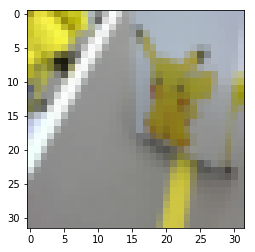

tensor(1)


In [110]:
imshow(images_data[0])
print(labels_data[0])

In [118]:
test_data_base = '.'
test_names = ['pikachu_1.jpg', 'dora.jpg', 'dora2.jpg', 'pika2.jpg']
test_img = []
for nm in test_names:
    im = Image.open(os.path.join(test_data_base,nm))
    print(im.size)
    transform = transforms.Compose(
        [
        transforms.Resize((32,32)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    tm  = transform(im)
    
    test_img.append(tm)
test_img = torch.stack(test_img)
labels = torch.ones((4), dtype=torch.int64)
labels[1] = 0
labels[2] = 0

(225, 225)
(187, 269)
(300, 168)
(275, 183)


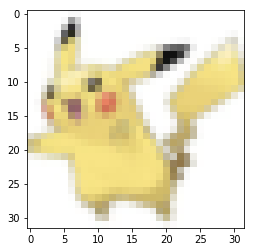

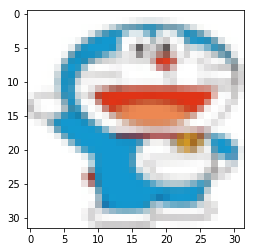

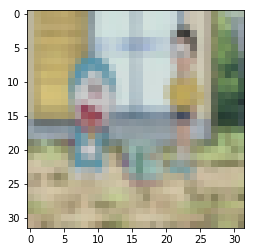

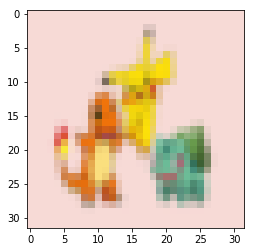

In [120]:
for item in test_img:
    imshow(item)

In [119]:
with torch.no_grad():
#     for item in idxls:
#     images, labels = images_data[item], labels_data[item]
    outputs = net(test_img)
    _, predicted = torch.max(outputs.data, 1)
    total = len(labels)
    print(predicted)
    print(labels)
    correct = (predicted == labels).sum().item()
    print(correct)

print('Accuracy of the network test images: %f ' % (
    1.0*correct / total))

tensor([0, 1, 0, 1])
tensor([1, 0, 0, 1])
2
Accuracy of the network test images: 0.500000 


In [123]:
list(range(0,-1,-3))

[0]